In [14]:
import pandas as pd
from Bio import SeqIO
import re

In [7]:
copy_dict = {'BACT.1122.00046.0079b_04268': 'B_acidifaciens',
  'BACT.1122.00025.0002i_00320': 'B_bouchesdurhonensis_1',
 'BACT.1122.00025.0002i_00430': 'B_bouchesdurhonensis_2',
 'BACT.1122.00018.0001i_00753': 'B_caccae_1',
 'BACT.1122.00018.0001i_00988': 'B_caccae_2',
 'BACT.1122.00002.0001i_03728': 'B_caecimuris',
 'BACT.1122.00017.0001i_01110': 'B_cellulosilyticus_1',
 'BACT.1122.00017.0001i_05334': 'B_cellulosilyticus_2',
 'BACT.1122.00017.0001i_03592': 'B_cellulosilyticus_3',
 'BACT.1122.00026.0011i_04441': 'B_congonensis',
 'BACT.1122.00028.0006i_00446': 'B_cutis',
 'BACT.1122.00038.0001i_00132': 'B_faecalis',
 'BACT.1122.00042.0031i_00294': 'B_faecichinchillae',
 'BACT.1122.00016.0001i_00630': 'B_faecis_1',
 'BACT.1122.00016.0001i_00843': 'B_faecis_2',
 'BACT.1122.00044.0050i_02351': 'B_fluxus',
 'BACT.1122.00005.0001i_00420': 'B_helcogenes',
 'BACT.1122.00009.0001i_01926': 'B_heparinolyticus',
 'BACT.1122.00021.0003i_03076': 'B_ihuae',
 'BACT.1122.00020.0002i_01964': 'B_intestinalis',
 'BACT.1122.00039.0006i_00689': 'B_koreensis',
 'BACT.1122.00003.0001i_02800': 'B_luhongzhouii_1',
 'BACT.1122.00003.0001i_00939': 'B_luhongzhouii_2',
 'BACT.1122.00003.0001i_00711': 'B_luhongzhouii_3',
 'BACT.1122.00023.0004i_02052': 'B_mediterraneensis',
 'BACT.1122.00022.0010i_04023': 'B_ndongoniae',
 'BACT.1122.00032.0010i_02594': 'B_oleiciplenus_1',
 'BACT.1122.00032.0019i_04226': 'B_oleiciplenus_2',
 'BACT.1122.00032.0023i_04935': 'B_oleiciplenus_3',
 'BACT.1122.00008.0001i_03248': 'B_ovatus',
 'BACT.1122.00041.0104i_02706': 'B_pyogenes',
 'BACT.1122.00048.0123i_01944': 'B_rodentium',
 'BACT.1122.00043.0051i_02361': 'B_stercorirosoris_1',
 'BACT.1122.00043.0063i_03234': 'B_stercorirosoris_2',
 'BACT.1122.00010.0001i_00808': 'B_thetaiotaomicron_1',
 'BACT.1122.00010.0001i_01090': 'B_thetaiotaomicron_2',
 'BACT.1122.00014.0001i_03527': 'B_uniformis',
 'BACT.1122.00019.0001i_03981': 'B_xylanisolvens',
 'BACT.1122.00011.0001i_01291': 'C_B_intestinigallinarum',
 'BACT.1122.00037.0009i_02106': 'B_reticulotermitis'}

In [8]:
with open(('/home/nastya/Bacteroides_uniformis_annotations/CD-HIT/lexA_bacteroides_filtered_similar.fa'), 'r', encoding='utf-8') as inp:
    records = list(SeqIO.parse(inp, "fasta"))

In [9]:
for rec in records:
    with open('/home/nastya/Bacteroides_uniformis_annotations/CD-HIT/lexA_bacteroides_filtered_similar_renamed.fa', 'a') as out:
        out.write(f'>{copy_dict[rec.id]}\n{rec.seq}\n')

In [16]:
fasta = '/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/b_uni_type_4only.fa'
gff = '/home/nastya/Bacteroides_uniformis_annotations/metatranscriptomics/b_uni_type_4only.gff3'
data = pd.read_csv(gff, comment='#', sep='\t', names=['ref', 'prodigal', 'CDS', 'start', 'end', 'row', 'strand', 'row2', 'annot'], engine='python')
data = data[data.CDS == 'CDS'][['annot']]
transc_dict = {}
for _,row in data.iterrows():
    text=row.annot
    ID = re.compile(r'ID=([A-Za-z0-9_.-]+)') 
    name = re.compile(r'Name=([A-Za-z0-9_-]+)')  
    findid = ID.findall(text.strip())[0]
    try:
        findname = name.findall(text.strip())[0]
    except:
        findname = findid
    transc_dict.update({findid:findname})
id_name = pd.DataFrame.from_dict(transc_dict, orient='index', columns=['gene'])
id_name = id_name.reset_index()
id_name.gene = id_name.gene.str.replace('cds-', '')
id_name['index'] = id_name['index'].str.replace('gene-', '')
id_name

,index,gene
0,bc2018--bc2018___80_00014,bc2018--bc2018___80_00014
1,bc2018--bc2018___80_00015,bc2018--bc2018___80_00015
2,bc2018--bc2018___80_00016,bc2018--bc2018___80_00016
3,bc2018--bc2018___80_00017,bc2018--bc2018___80_00017
4,bc2018--bc2018___80_00018,hup_1
...,...,...
3831,bc2018--bc2018___80_03908,mdtB_2
3832,bc2018--bc2018___80_03909,bc2018--bc2018___80_03909
3833,bc2018--bc2018___80_03910,bc2018--bc2018___80_03910
3834,bc2018--bc2018___80_03911,secD


In [18]:
id_name = id_name[~id_name['gene'].str.startswith('bc2018--bc2018')]
id_name

,index,gene
4,bc2018--bc2018___80_00018,hup_1
5,bc2018--bc2018___80_00019,argS
6,bc2018--bc2018___80_00020,topA
8,bc2018--bc2018___80_00022,cpoB
9,bc2018--bc2018___80_00023,nudC_1
...,...,...
3829,bc2018--bc2018___80_03906,rhaS_9
3830,bc2018--bc2018___80_03907,ttgD_2
3831,bc2018--bc2018___80_03908,mdtB_2
3834,bc2018--bc2018___80_03911,secD


In [20]:
id_name[['name', 'number']] = id_name.gene.str.split("_", expand = True)
id_name

/tmp/ipykernel_7937/1091058378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_name[['name', 'number']] = id_name.gene.str.split("_", expand = True)
/tmp/ipykernel_7937/1091058378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_name[['name', 'number']] = id_name.gene.str.split("_", expand = True)


,index,gene,name,number
4,bc2018--bc2018___80_00018,hup_1,hup,1
5,bc2018--bc2018___80_00019,argS,argS,None
6,bc2018--bc2018___80_00020,topA,topA,None
8,bc2018--bc2018___80_00022,cpoB,cpoB,None
9,bc2018--bc2018___80_00023,nudC_1,nudC,1
...,...,...,...,...
3829,bc2018--bc2018___80_03906,rhaS_9,rhaS,9
3830,bc2018--bc2018___80_03907,ttgD_2,ttgD,2
3831,bc2018--bc2018___80_03908,mdtB_2,mdtB,2
3834,bc2018--bc2018___80_03911,secD,secD,None


In [23]:
a = id_name.groupby('name').count()

In [26]:
a.columns

Index(['index', 'gene', 'number'], dtype='object')

In [46]:
a.sort_values('gene', ascending=False).head(15)[['gene']]

,gene
name,
rcsC,39
susC,16
xerC,15
lacZ,12
btuB,12
sasA,10
rhaS,9
mepA,8
btuD,8


In [47]:
b = a.sort_values('gene', ascending=False)[['gene']]

In [51]:
b[b.gene==2]

,gene
name,
purH,2
mdtB,2
trpB,2
mrdB,2
mprA,2
...,...
pepD,2
udk,2
uvrA,2


      number
name        
rcsC      39
susC      16
xerC      15
lacZ      12
btuB      12
...      ...
kdsD       0
kduD       0
kduI       0
kpsU       0
zwf        0

[1104 rows x 1 columns]


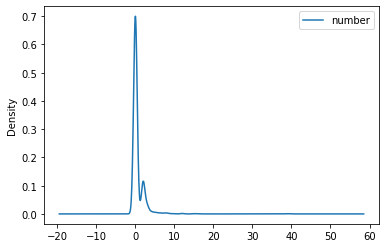

In [37]:
b.plot(kind='kde')
print(b)